<a href="https://colab.research.google.com/github/msaenzre07/Mineria-de-Datos/blob/main/lab3_Mar%C3%ADa_S%C3%A1enz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import librerías

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from matplotlib.gridspec import GridSpec



# Carga de datos dataset Women's E-Commerce Clothing Reviews

In [6]:
url='https://raw.githubusercontent.com/msaenzre07/Mineria-de-Datos/main/Womens%20Clothing%20E-Commerce%20Reviews.csv'
df = pd.read_csv(url)

In [7]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Estructura de datos del dataset

In [8]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.shape

(23486, 11)

In [10]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [11]:
df.isnull().any().any()

True

In [12]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [13]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

# Nuevo dataset

In [17]:

new_df = df.loc[:, ['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 
                    'Division Name', 'Department Name', 'Class Name']]

# Determinar variables categoricas

In [18]:
def dummy(df,i):
    col=pd.get_dummies(df[i],prefix=i)
    col=col.drop(col.columns[0],axis=1)
    df=pd.concat([df,col],axis=1)
    df=df.drop(i,axis=1)
    return df

j=['Division Name','Department Name','Class Name']
for i in j:
    df=dummy(df,i) 

# Generar Scripts

In [20]:
# Valores únicos de la columna Rating
print("Valores únicos de Rating:", new_df['Rating'].unique())

# Valores únicos de la columna Recommended IND
print("Valores únicos de Recommended IND:", new_df['Recommended IND'].unique())


# Valores únicos de la columna Positive Feedback Count
print("Valores únicos de Positive Feedback Count:", new_df['Positive Feedback Count'].unique())

Valores únicos de Rating: [4 5 3 2 1]
Valores únicos de Recommended IND: [1 0]
Valores únicos de Positive Feedback Count: [  0   4   6   1  14   2   3   7   5   9  34  10  17  11  24  12   8  13
  20  16  23  15  19  29  32  30  55  84  27  43  21  42  37  71  35  65
 117  33  18  25  47  22  51  94  31  77  61  46  26  28  36  57  45  66
  82  44  81  58  78  38  49  52 122  41 108  54  40  53  87  64  89  68
  56  98  95  39  93  48  99  50  69  59]


# Determinar Conjunto de valores

In [21]:
df.isnull().any().any()

True

In [22]:
df.isnull().sum()

Unnamed: 0                         0
Clothing ID                        0
Age                                0
Title                           3810
Review Text                      845
Rating                             0
Recommended IND                    0
Positive Feedback Count            0
Division Name_General Petite       0
Division Name_Initmates            0
Department Name_Dresses            0
Department Name_Intimate           0
Department Name_Jackets            0
Department Name_Tops               0
Department Name_Trend              0
Class Name_Casual bottoms          0
Class Name_Chemises                0
Class Name_Dresses                 0
Class Name_Fine gauge              0
Class Name_Intimates               0
Class Name_Jackets                 0
Class Name_Jeans                   0
Class Name_Knits                   0
Class Name_Layering                0
Class Name_Legwear                 0
Class Name_Lounge                  0
Class Name_Outerwear               0
C

# Cambiar nombre columnas

In [25]:
# Crear diccionario de nombres de columnas
new_names = {'Age': 'Edad',
                  'Rating': 'Calificación',
                  'Recommended IND': 'Recomendado',
                  'Positive Feedback Count': 'Comentarios Positivos',
                  'Division Name': 'División',
                  'Department Name': 'Departamento',
                  'Class Name': 'Clase'}

# Cambiar los nombres de las columnas
new_df = new_df.rename(columns=new_names)

#Grafico Boxplot


Boxplots por División



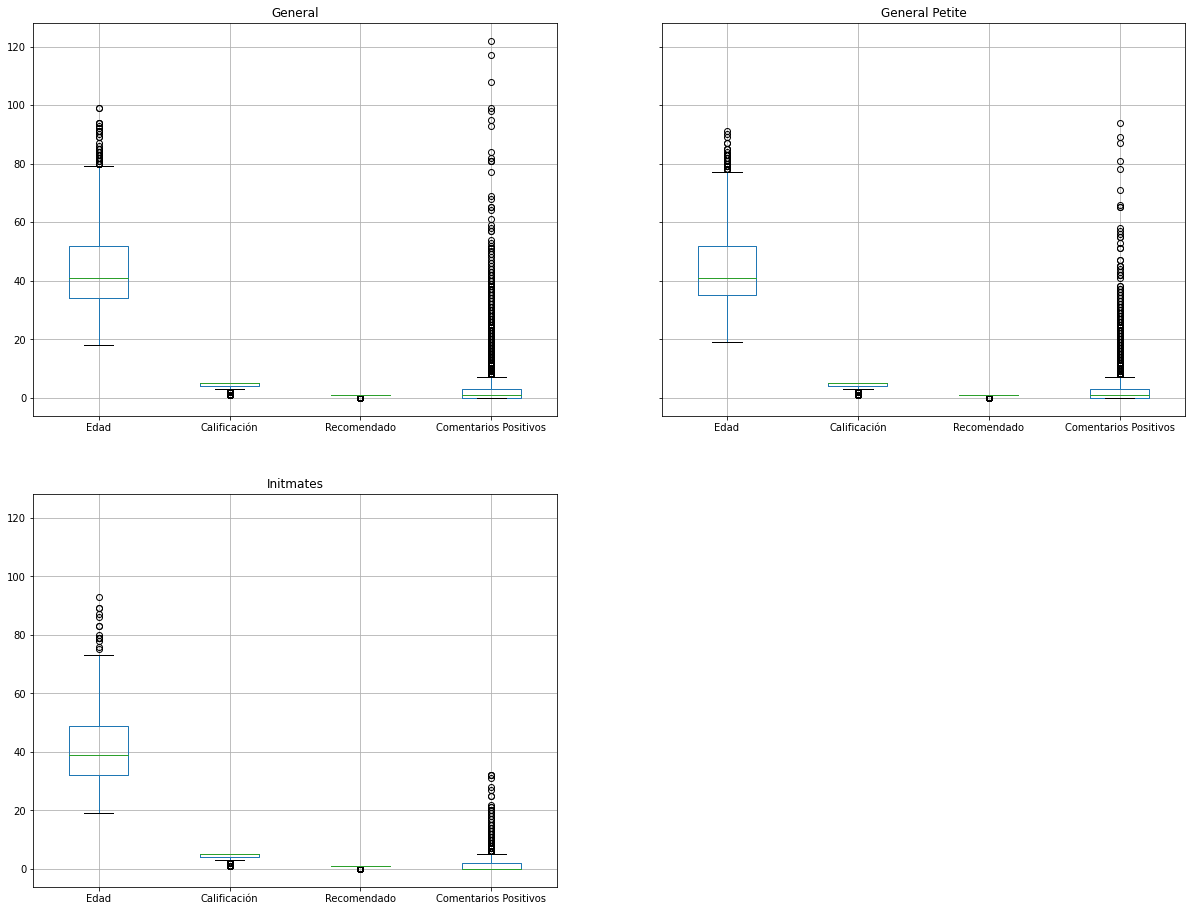


Boxplots por Departamento



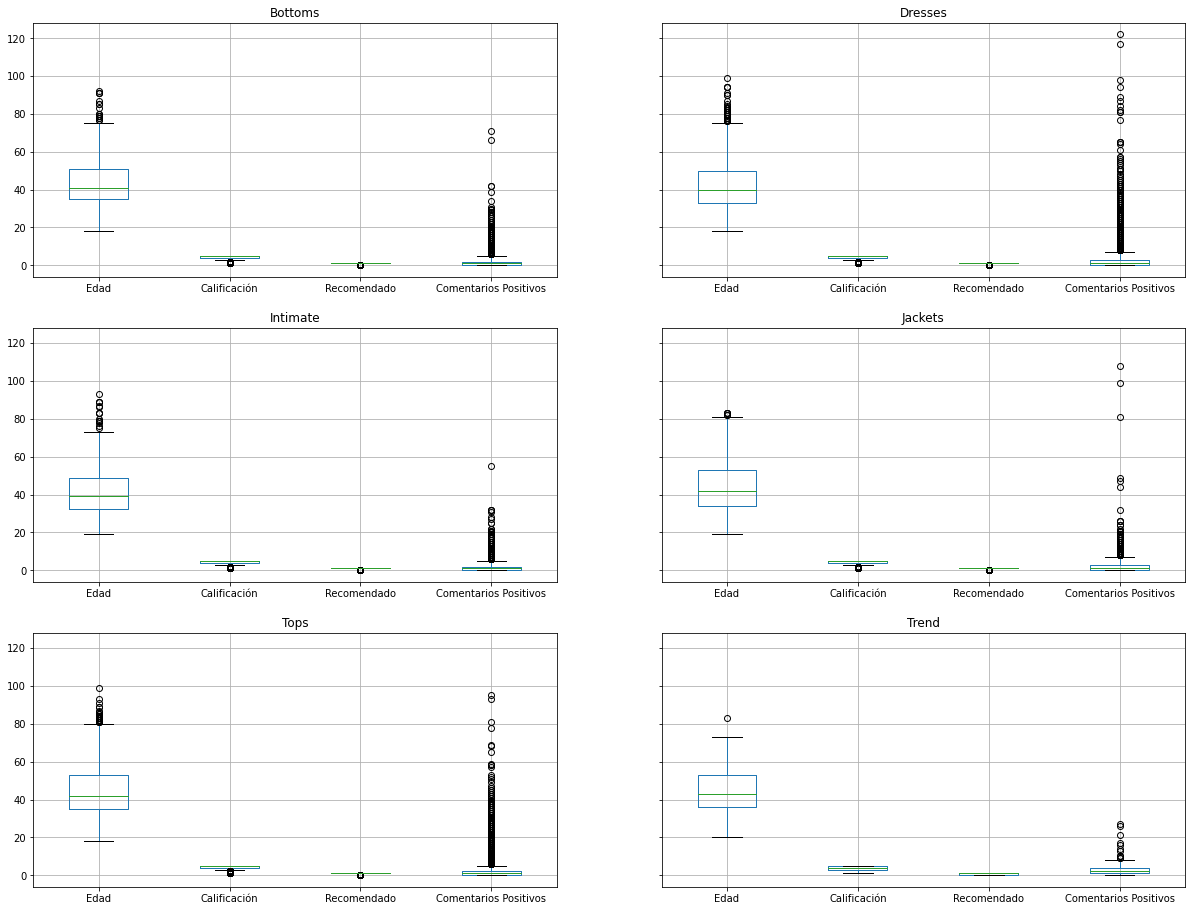


Boxplots por Clase



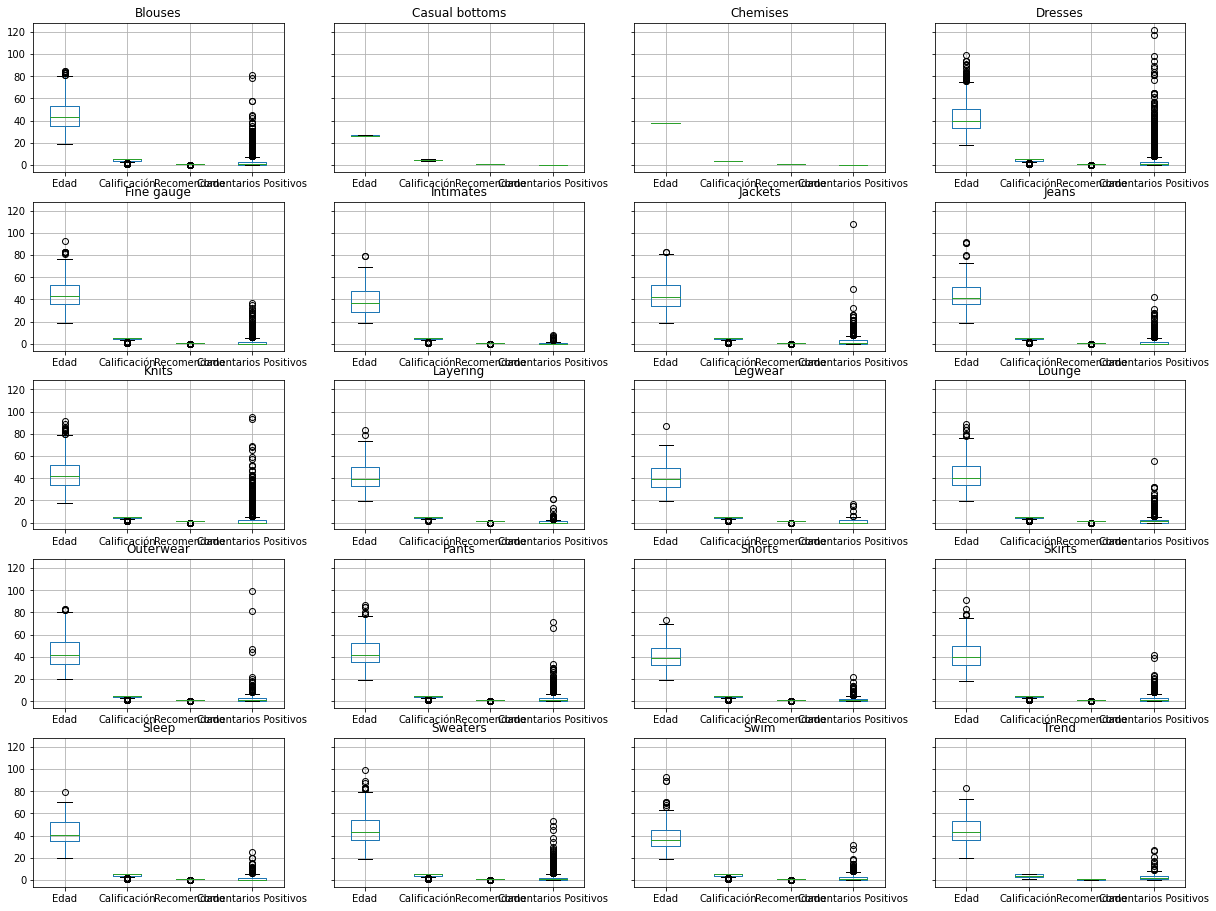

In [26]:
print("\nBoxplots por División\n")
new_df.groupby(['División']).boxplot(column=['Edad', 'Calificación', 'Recomendado', 'Comentarios Positivos'], 
                                     figsize=(20,16))
plt.show()

print("\nBoxplots por Departamento\n")
new_df.groupby(['Departamento']).boxplot(column=['Edad', 'Calificación', 'Recomendado', 'Comentarios Positivos'], 
                                         figsize=(20,16))
plt.show()

print("\nBoxplots por Clase\n")
new_df.groupby(['Clase']).boxplot(column=['Edad', 'Calificación', 'Recomendado', 'Comentarios Positivos'], 
                                  figsize=(20,16))
plt.show()

#Generar Histogramas

Histograma de edad para la división Initmates


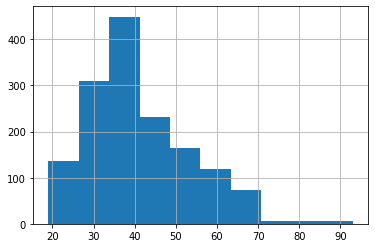

Histograma de edad para la división General


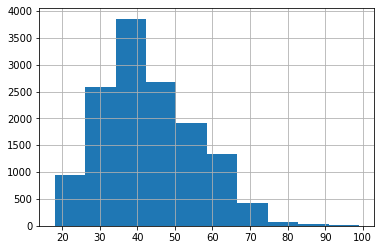

Histograma de edad para la división General Petite


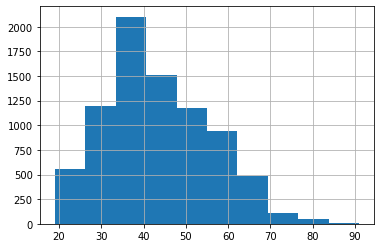

Histograma de edad para la división nan


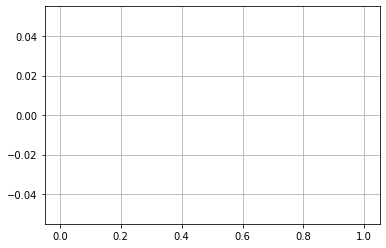

Histograma de edad para el departamento Intimate


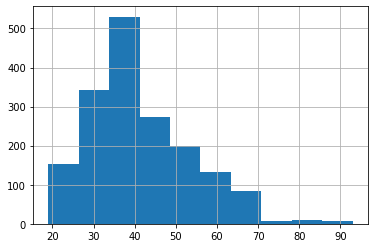

Histograma de edad para el departamento Dresses


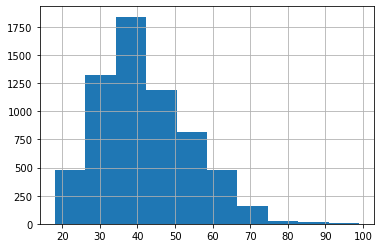

Histograma de edad para el departamento Bottoms


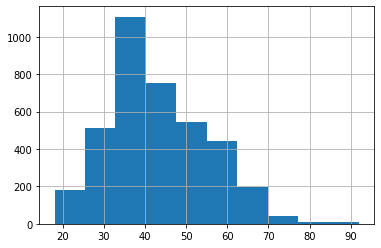

Histograma de edad para el departamento Tops


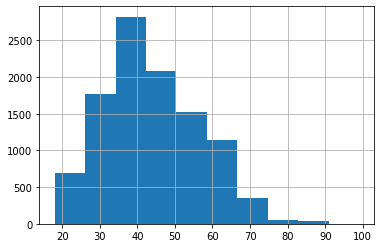

Histograma de edad para el departamento Jackets


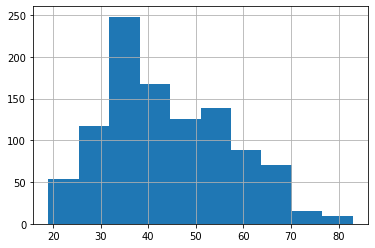

Histograma de edad para el departamento Trend


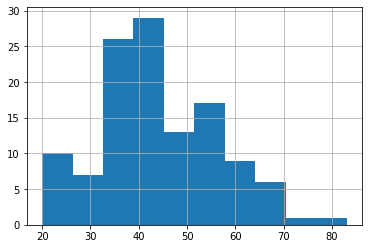

Histograma de edad para el departamento nan


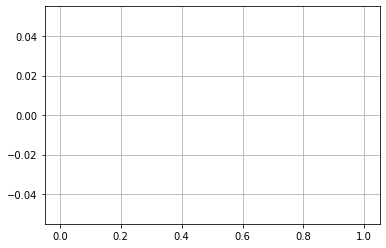

Histograma de edad para la clase Intimates


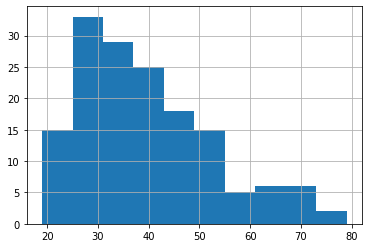

Histograma de edad para la clase Dresses


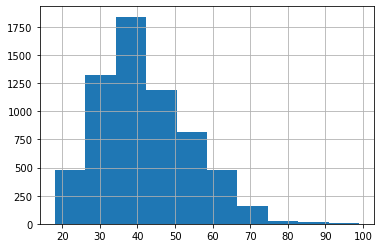

Histograma de edad para la clase Pants


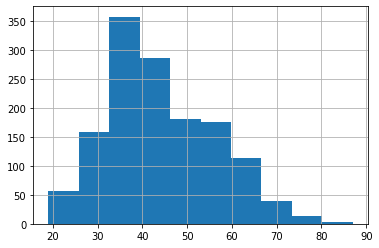

Histograma de edad para la clase Blouses


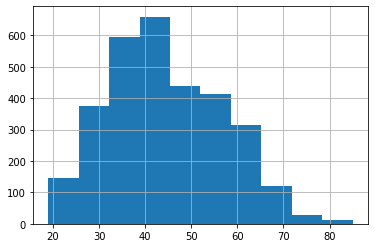

Histograma de edad para la clase Knits


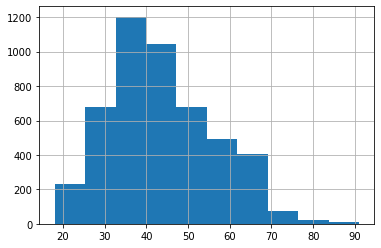

Histograma de edad para la clase Outerwear


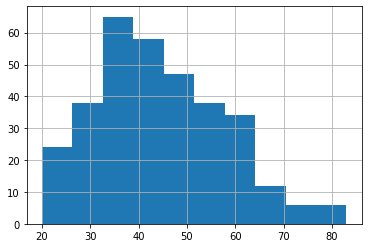

Histograma de edad para la clase Lounge


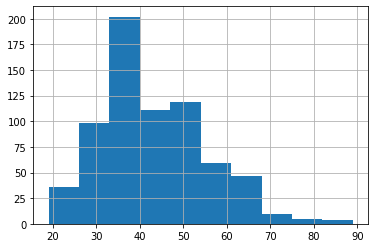

Histograma de edad para la clase Sweaters


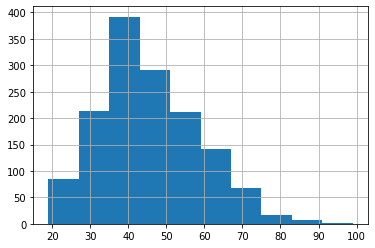

Histograma de edad para la clase Skirts


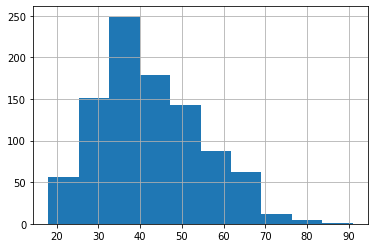

Histograma de edad para la clase Fine gauge


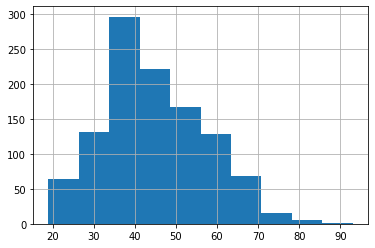

Histograma de edad para la clase Sleep


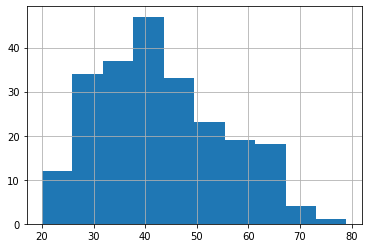

Histograma de edad para la clase Jackets


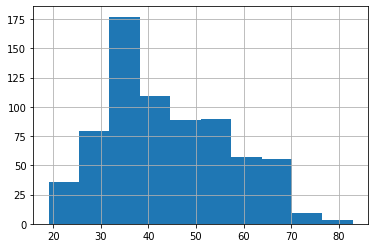

Histograma de edad para la clase Swim


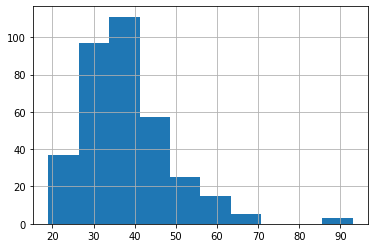

Histograma de edad para la clase Trend


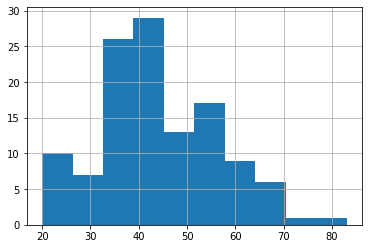

Histograma de edad para la clase Jeans


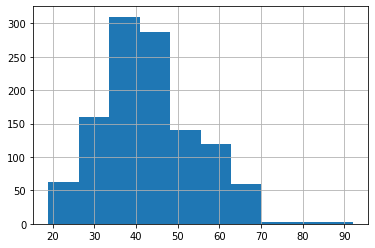

Histograma de edad para la clase Legwear


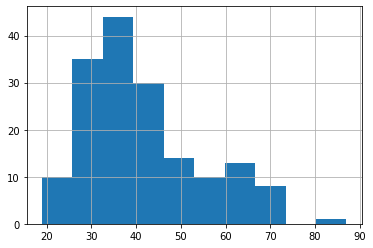

Histograma de edad para la clase Shorts


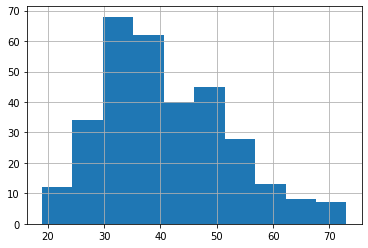

Histograma de edad para la clase Layering


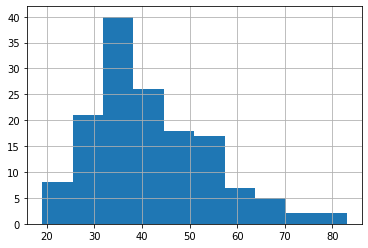

Histograma de edad para la clase Casual bottoms


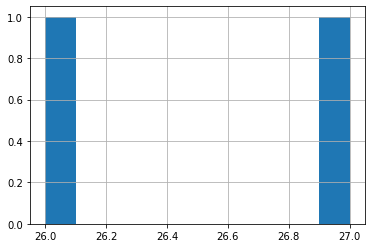

Histograma de edad para la clase nan


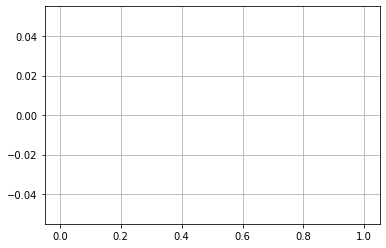

Histograma de edad para la clase Chemises


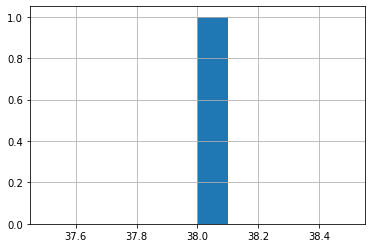

In [27]:
# Histogramas de la edad por División
for division in new_df['División'].unique():
  print("Histograma de edad para la división", division)
  new_df[new_df['División'] == division]['Edad'].hist()
  plt.show()

# Histogramas de la edad por Departamento
for department in new_df['Departamento'].unique():
  print("Histograma de edad para el departamento", department)
  new_df[new_df['Departamento'] == department]['Edad'].hist()
  plt.show()

# Histogramas de la edad por Clase
for clas in new_df['Clase'].unique():
  print("Histograma de edad para la clase", clas)
  new_df[new_df['Clase'] == clas]['Edad'].hist()
  plt.show()

# Generar Agrupación Datos

In [28]:
# Cantidad de datos por División
print("\nCantidad de datos por División:\n", new_df['División'].value_counts())

# Cantidad de datos por Departamento
print("\nCantidad de datos por Departamento:\n", new_df['Departamento'].value_counts())

# Cantidad de datos por Clase
print("\nCantidad de datos por Clase:\n", new_df['Clase'].value_counts())


Cantidad de datos por División:
 General           13850
General Petite     8120
Initmates          1502
Name: División, dtype: int64

Cantidad de datos por Departamento:
 Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Departamento, dtype: int64

Cantidad de datos por Clase:
 Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Clase, dtype: int64


#Convertir en Dataframes

In [32]:
# Convertir las series en dataframes
division_count = pd.DataFrame(new_df['División'].value_counts().reset_index())
departamento_count = pd.DataFrame(new_df['Departamento'].value_counts().reset_index())
clase_count = pd.DataFrame(new_df['Clase'].value_counts().reset_index())

# Cambiar los nombres de las columnas
division_count.columns = ['División', 'Cantidad']
departamento_count.columns = ['Departamento', 'Cantidad']
clase_count.columns = ['Clase', 'Cantidad']

# Mostrar los dataframes resultantes
print("\nDataframe de cantidad de datos por División:\n", division_count)
print("\nDataframe de cantidad de datos por Departamento:\n", departamento_count)
print("\nDataframe de cantidad de datos por Clase:\n", clase_count)


Dataframe de cantidad de datos por División:
          División  Cantidad
0         General     13850
1  General Petite      8120
2       Initmates      1502

Dataframe de cantidad de datos por Departamento:
   Departamento  Cantidad
0         Tops     10468
1      Dresses      6319
2      Bottoms      3799
3     Intimate      1735
4      Jackets      1032
5        Trend       119

Dataframe de cantidad de datos por Clase:
              Clase  Cantidad
0          Dresses      6319
1            Knits      4843
2          Blouses      3097
3         Sweaters      1428
4            Pants      1388
5            Jeans      1147
6       Fine gauge      1100
7           Skirts       945
8          Jackets       704
9           Lounge       691
10            Swim       350
11       Outerwear       328
12          Shorts       317
13           Sleep       228
14         Legwear       165
15       Intimates       154
16        Layering       146
17           Trend       119
18  Casual bottoms  

#Generar graficos PIE y de Barra

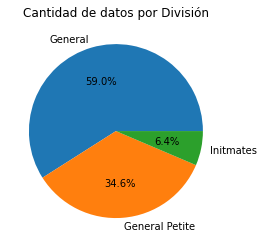

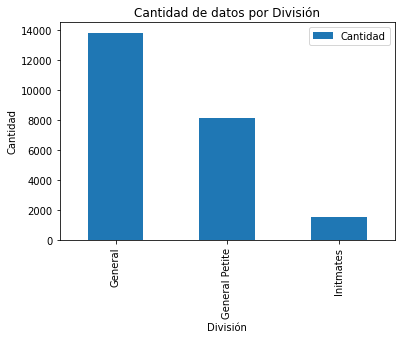

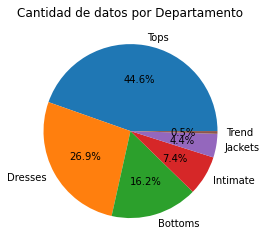

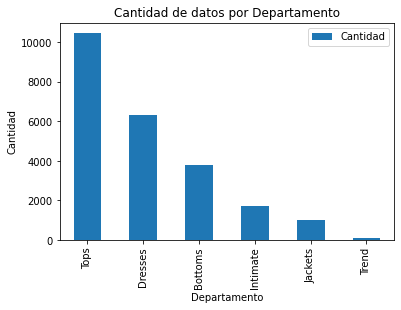

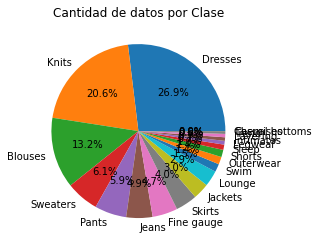

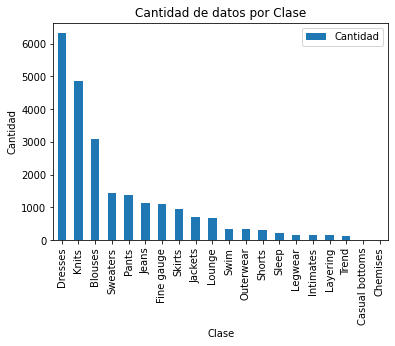

In [33]:
# Gráfico de Pie para cantidad de datos por División
division_count.plot(kind='pie', y='Cantidad', labels=division_count['División'], autopct='%1.1f%%', legend=False)
plt.title("Cantidad de datos por División")
plt.ylabel("")
plt.show()

# Gráfico de Barras para cantidad de datos por División
division_count.plot(kind='bar', x='División', y='Cantidad')
plt.title("Cantidad de datos por División")
plt.xlabel("División")
plt.ylabel("Cantidad")
plt.show()

# Gráfico de Pie para cantidad de datos por Departamento
departamento_count.plot(kind='pie', y='Cantidad', labels=departamento_count['Departamento'], autopct='%1.1f%%', legend=False)
plt.title("Cantidad de datos por Departamento")
plt.ylabel("")
plt.show()

# Gráfico de Barras para cantidad de datos por Departamento
departamento_count.plot(kind='bar', x='Departamento', y='Cantidad')
plt.title("Cantidad de datos por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Cantidad")
plt.show()

# Gráfico de Pie para cantidad de datos por Clase
clase_count.plot(kind='pie', y='Cantidad', labels=clase_count['Clase'], autopct='%1.1f%%', legend=False)
plt.title("Cantidad de datos por Clase")
plt.ylabel("")
plt.show()

# Gráfico de Barras para cantidad de datos por Clase
clase_count.plot(kind='bar', x='Clase', y='Cantidad')
plt.title("Cantidad de datos por Clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

#Promedio Edad

In [34]:
# Promedio de edad por División
print("Promedio de edad por División:\n", new_df.groupby(['División'])['Edad'].mean())

# Promedio de edad por Departamento
print("\nPromedio de edad por Departamento:\n", new_df.groupby(['Departamento'])['Edad'].mean())

# Promedio de edad por Clase
print("\nPromedio de edad por Clase:\n", new_df.groupby(['Clase'])['Edad'].mean())

Promedio de edad por División:
 División
General           43.345848
General Petite    43.334729
Initmates         41.137816
Name: Edad, dtype: float64

Promedio de edad por Departamento:
 Departamento
Bottoms     43.093182
Dresses     42.114892
Intimate    41.295677
Jackets     43.964147
Tops        44.125908
Trend       44.058824
Name: Edad, dtype: float64

Promedio de edad por Clase:
 Clase
Blouses           44.252502
Casual bottoms    26.500000
Chemises          38.000000
Dresses           42.114892
Fine gauge        44.730909
Intimates         39.155844
Jackets           43.813920
Jeans             43.115955
Knits             43.630807
Layering          41.527397
Legwear           41.545455
Lounge            42.717800
Outerwear         44.286585
Pants             44.047550
Shorts            40.728707
Skirts            42.492063
Sleep             43.100877
Sweaters          45.064426
Swim              38.048571
Trend             44.058824
Name: Edad, dtype: float64
